In [46]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:xlabel='petal_width', ylabel='Count'>

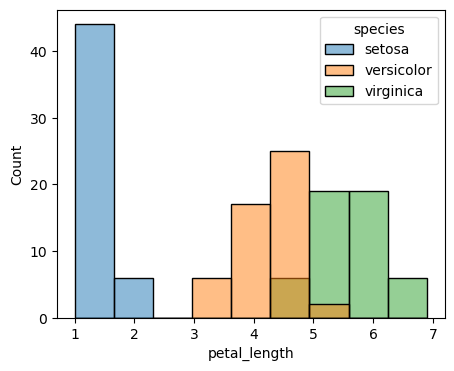

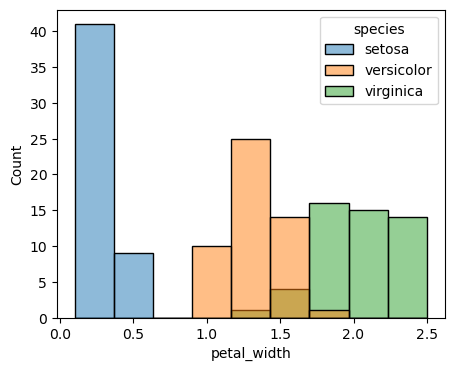

In [44]:
plt.figure(figsize=(5,4))
sns.histplot(data=iris,x="petal_length",hue="species")
plt.figure(figsize=(5,4))
sns.histplot(data=iris,x="petal_width",hue="species")

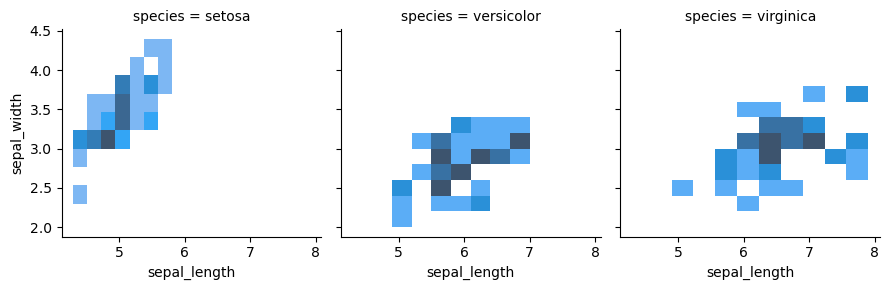

In [39]:
g=sns.FacetGrid(iris,col="species")
g.map(sns.histplot,"sepal_length","sepal_width")

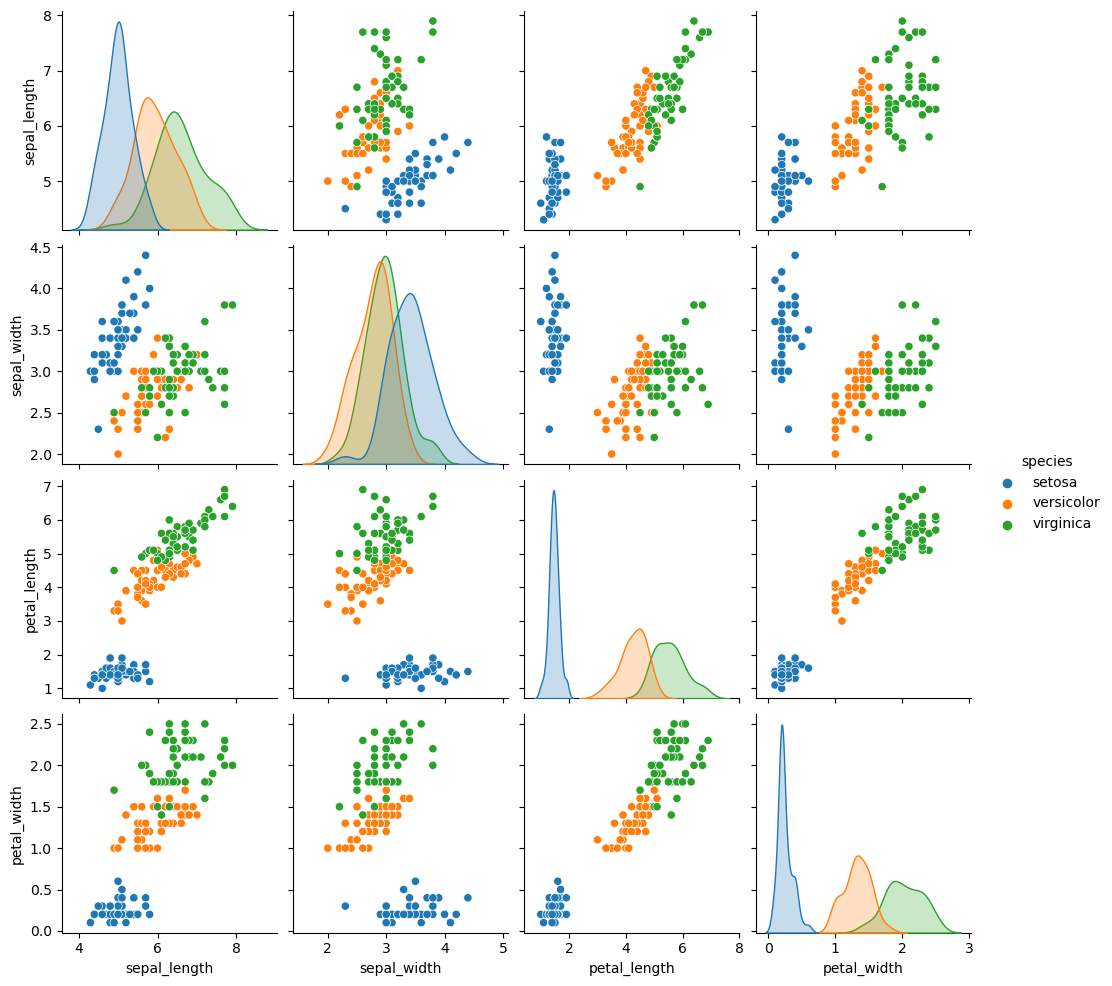

In [54]:
sns.pairplot(iris,hue="species")

In [6]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [10]:
X_train

array([[5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3

In [11]:
y_train

array(['setosa', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'vi

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[-1.01827123,  1.2864604 , -1.39338902, -1.3621769 ],
       [-0.7730102 ,  2.43545215, -1.33550342, -1.49647603],
       [-0.03722712, -0.78172474,  0.74837808,  0.92090833],
       [ 0.20803391,  0.8268637 ,  0.4010645 ,  0.51801093],
       [ 1.06644751,  0.13746866,  0.51683569,  0.3837118 ],
       [-0.52774918,  1.97585545, -1.45127462, -1.09357864],
       [-0.52774918,  1.51625875, -1.33550342, -1.3621769 ],
       [-0.40511866, -1.47111979, -0.06202028, -0.28778385],
       [ 0.57592545, -0.55192639,  0.74837808,  0.3837118 ],
       [ 0.69855596,  0.13746866,  0.97992047,  0.7866092 ],
       [ 0.94381699, -0.09232969,  0.3431789 ,  0.24941267],
       [ 1.67960008,  1.2864604 ,  1.32723405,  1.72670311],
       [-0.15985763, -0.32212804,  0.2274077 ,  0.11511354],
       [ 2.17012213, -0.09232969,  1.61666204,  1.18950659],
       [-0.28248815, -0.09232969,  0.4010645 ,  0.3837118 ],
       [-0.89564072,  1.05666205, -1.39338902, -1.3621769 ],
       [ 2.29275265, -0.

In [15]:
X_test

array([[ 0.33066442, -0.55192639,  0.51683569, -0.01918559],
       [-0.15985763,  1.7460571 , -1.21973223, -1.22787777],
       [ 2.29275265, -1.01152309,  1.79031883,  1.45810485],
       [ 0.20803391, -0.32212804,  0.4010645 ,  0.3837118 ],
       [ 1.18907802, -0.55192639,  0.57472129,  0.24941267],
       [-0.52774918,  0.8268637 , -1.33550342, -1.09357864],
       [-0.28248815, -0.32212804, -0.11990588,  0.11511354],
       [ 1.31170853,  0.13746866,  0.74837808,  1.45810485],
       [ 0.45329494, -1.93071649,  0.4010645 ,  0.3837118 ],
       [-0.03722712, -0.78172474,  0.05375091, -0.01918559],
       [ 0.82118648,  0.367267  ,  0.74837808,  1.05520746],
       [-1.26353226, -0.09232969, -1.39338902, -1.49647603],
       [-0.40511866,  1.05666205, -1.45127462, -1.3621769 ],
       [-1.14090175,  0.13746866, -1.33550342, -1.49647603],
       [-0.89564072,  1.7460571 , -1.33550342, -1.22787777],
       [ 0.57592545,  0.59706535,  0.51683569,  0.51801093],
       [ 0.82118648, -0.

In [47]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [48]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
ac=accuracy_score(y_test, y_pred)
print("Accuracy Score is:",ac*100,"%")

Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]
Accuracy Score is: 97.36842105263158 %


[Text(0.3333333333333333, 0.9375, 'X[3] <= -0.556\nentropy = 1.583\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2222222222222222, 0.8125, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.4444444444444444, 0.8125, 'X[2] <= 0.546\nentropy = 1.0\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(0.2222222222222222, 0.6875, 'X[3] <= 0.585\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.1111111111111111, 0.5625, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3333333333333333, 0.5625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6875, 'X[2] <= 0.777\nentropy = 0.527\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.5555555555555556, 0.5625, 'X[3] <= 0.719\nentropy = 0.896\nsamples = 16\nvalue = [0, 5, 11]'),
 Text(0.3333333333333333, 0.4375, 'X[1] <= -1.586\nentropy = 0.918\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.2222222222222222, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3125, 'X[2] 

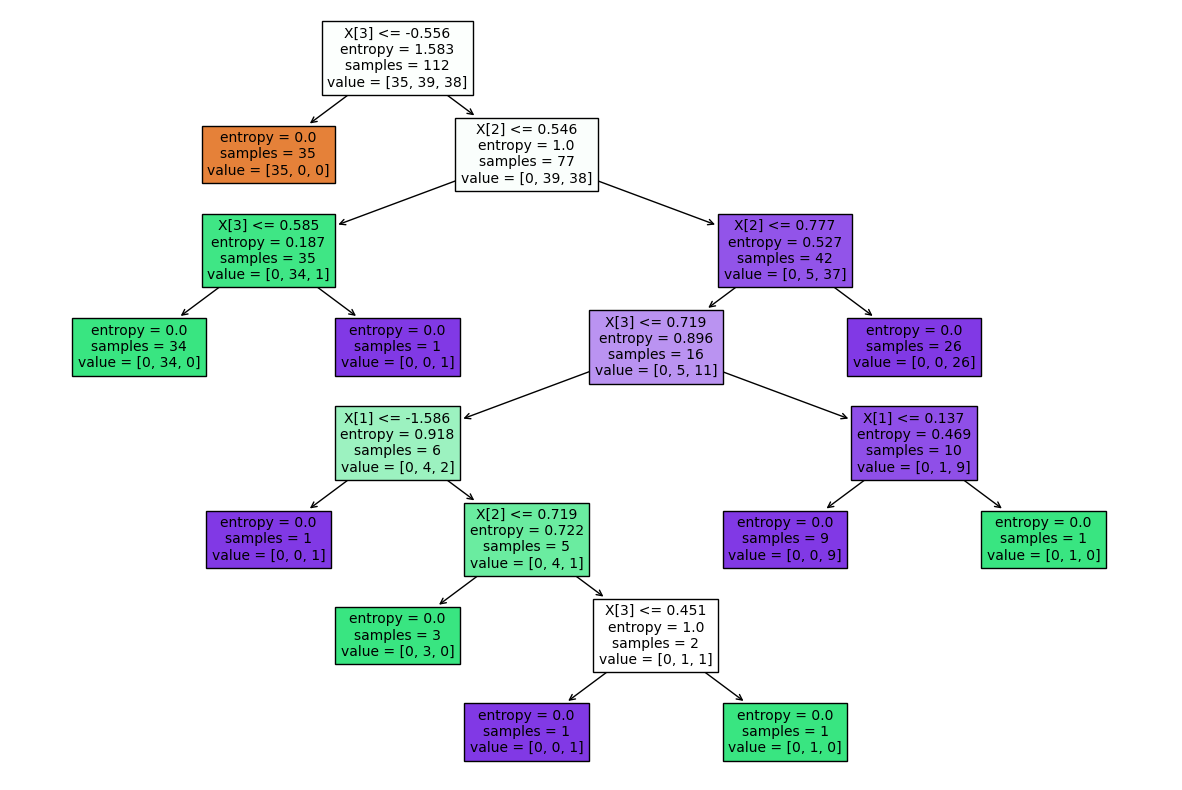

In [51]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True,fontsize=10)

In [53]:
print(tree.export_text(classifier))

|--- feature_3 <= -0.56
|   |--- class: setosa
|--- feature_3 >  -0.56
|   |--- feature_2 <= 0.55
|   |   |--- feature_3 <= 0.59
|   |   |   |--- class: versicolor
|   |   |--- feature_3 >  0.59
|   |   |   |--- class: virginica
|   |--- feature_2 >  0.55
|   |   |--- feature_2 <= 0.78
|   |   |   |--- feature_3 <= 0.72
|   |   |   |   |--- feature_1 <= -1.59
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- feature_1 >  -1.59
|   |   |   |   |   |--- feature_2 <= 0.72
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |   |--- feature_2 >  0.72
|   |   |   |   |   |   |--- feature_3 <= 0.45
|   |   |   |   |   |   |   |--- class: virginica
|   |   |   |   |   |   |--- feature_3 >  0.45
|   |   |   |   |   |   |   |--- class: versicolor
|   |   |   |--- feature_3 >  0.72
|   |   |   |   |--- feature_1 <= 0.14
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- feature_1 >  0.14
|   |   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  0.78